# Customer Churn Predication Using ANN

--- Binary Classifiaction Problem

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [59]:
df =pd.read_csv('Churn_Modelling.csv')

In [60]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [62]:
df.duplicated().sum()

0

In [63]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [64]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [65]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [66]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [67]:
df =pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [68]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [69]:
X =df.drop(columns=['Exited'])
y =df['Exited'].values
from sklearn.model_selection import train_test_split
X_train ,X_test,Y_train,Y_test =train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
X_train_Scaled =scale.fit_transform(X_train)
X_test_scaled =scale.transform(X_test)

In [70]:
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
model =Sequential()
model.add(Dense(3,activation ='sigmoid',input_dim =11))
model.add(Dense(1,activation ='sigmoid'))

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [74]:
model.fit(X_train_Scaled,Y_train,epochs=10)

Epoch 1/10

250/250 [==============================] - 2s 2ms/step - loss: 0.4960
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4617
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4493
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4424
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4376
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4341
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4315
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4296
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4280
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4267


In [75]:
model.layers[1].get_weights()

[array([[-1.0127587 ],
        [-1.6702158 ],
        [-0.49340042]], dtype=float32),
 array([0.06837142], dtype=float32)]

In [77]:
y_log =model.predict(X_test_scaled) # converting the probalbality output to binary

63/63 [==============================] - 0s 2ms/step


In [79]:
y_pred = np.where(y_log >= 0.5 ,1,0)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8005

In [81]:
 # model 2
model =Sequential()
model.add(Dense(11,activation ='sigmoid',input_dim =11))
model.add(Dense(11,activation ='sigmoid'))
model.add(Dense(1,activation ='sigmoid'))

In [90]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) 
# now the model also provide accuracy with loss after every epouchs



In [91]:
history_of_mode =model.fit(X_train_Scaled,Y_train,epochs=100,validation_split=0.2)
# the validation split take  60 percent data  and perform testing also on it to sjow accuracy 

Epoch 1/100

200/200 [==============================] - 2s 4ms/step - loss: 0.3225 - accuracy: 0.8656 - val_loss: 0.3426 - val_accuracy: 0.8556
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3221 - accuracy: 0.8672 - val_loss: 0.3433 - val_accuracy: 0.8556
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3225 - accuracy: 0.8666 - val_loss: 0.3436 - val_accuracy: 0.8550
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3222 - accuracy: 0.8664 - val_loss: 0.3433 - val_accuracy: 0.8569
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3221 - accuracy: 0.8655 - val_loss: 0.3445 - val_accuracy: 0.8581
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3220 - accuracy: 0.8670 - val_loss: 0.3454 - val_accuracy: 0.8537
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3220 - accuracy: 0.8675 - val_loss: 0.3433 - val_accuracy: 0.856

acuuracy of both validation_loss and validation accuracy should increase if does not that result in overfitting

In [87]:
y_log =model.predict(X_test_scaled)
y_pred = np.where(y_log >= 0.5 ,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

63/63 [==============================] - 0s 2ms/step


0.8625

In [88]:
history_of_mode.history

{'loss': [0.3325245678424835,
  0.33222371339797974,
  0.3319191634654999,
  0.3323024809360504,
  0.3313601315021515,
  0.33148154616355896,
  0.3308735191822052,
  0.3307039737701416,
  0.3307451903820038,
  0.33035561442375183,
  0.3303510248661041,
  0.3301432132720947,
  0.32971861958503723,
  0.3297875225543976,
  0.3294893503189087,
  0.32932353019714355,
  0.32903361320495605,
  0.3285026252269745,
  0.3290828764438629,
  0.3286537230014801,
  0.32856667041778564,
  0.3286137282848358,
  0.3280760645866394,
  0.3278445899486542,
  0.32810986042022705,
  0.3281569182872772,
  0.3273838460445404,
  0.3276657164096832,
  0.3274369537830353,
  0.3274990916252136,
  0.32715335488319397,
  0.32728397846221924,
  0.32678088545799255,
  0.32688388228416443,
  0.32652613520622253,
  0.3268858790397644,
  0.32679179310798645,
  0.3262706696987152,
  0.32654473185539246,
  0.3261267840862274,
  0.3258073925971985,
  0.3258531093597412,
  0.325693815946579,
  0.32562533020973206,
  0.32584

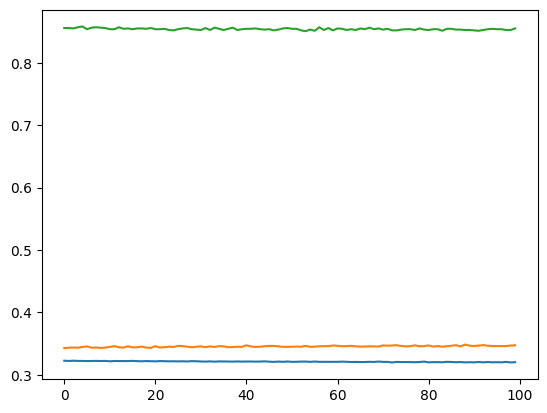

In [92]:
plt.plot(history_of_mode.history['loss'])
plt.plot(history_of_mode.history['val_loss'])
plt.plot(history_of_mode.history['val_accuracy'])


# MNSIT dataset A multiclass problem

In [93]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,Flatten


In [94]:
(X_train ,Y_train),(X_test,Y_test ) =keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 10s 1us/step


In [96]:
X_train.shape


(60000, 28, 28)

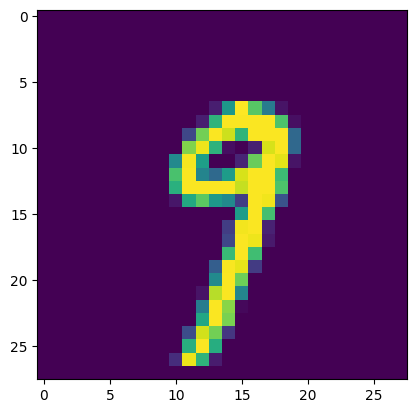

In [109]:
plt.imshow(X_train[133])

In [110]:
X_train =X_train/255
X_test =X_test/255

In [117]:
model =Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation ='relu'))

model.add(Dense(10,activation ='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [118]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
Model_performance =model.fit(X_train,Y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0592 - accuracy: 0.9826 - val_loss: 0.0847 - val_accuracy: 0.9741
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0898 - val_accuracy: 0.9722
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9895 - val_loss: 0.0994 - val_accuracy: 0.9724
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0944 - val_accuracy: 0.9744
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0984 - val_accuracy: 0.9731
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.0927 - val_accuracy: 0.9751
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.0986 - val_accuracy:

In [121]:
y_prob =model.predict(X_test)
y_pred= y_prob.argmax(axis=1) # to chech the maxium probality of a number to be on the axis 
accuracy_score(Y_test,y_pred)

313/313 [==============================] - 1s 2ms/step


0.9766

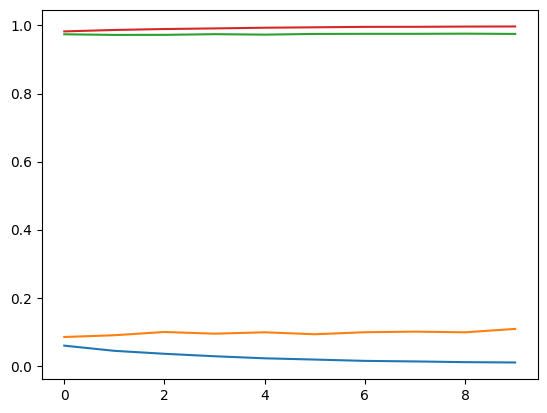

In [126]:


plt.plot(Model_performance.history['loss'] ,label='Loss')
plt.plot(Model_performance.history['val_loss'],label='val_loss')
plt.plot(Model_performance.history['val_accuracy'],label='val_accuracy')
plt.plot(Model_performance.history['accuracy'],label='accuracy')

# Using Keras Library Working on Regression Problem